In [1]:
import numpy as np
import pandas as pd

## Group by：分组技术
### 概述
groupby方法进行分组，传入分组依据，可以是依据列名，也可以传入任意的series，即便此series未出现在dataframe中，只要长度一致。

In [2]:
df1 = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                    'data2':np.random.randn(5)})
df1

,data1,data2,key1,key2
0,1.096646,-1.436704,a,one
1,-0.201517,-0.752637,a,two
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two
4,-0.535238,-0.229636,a,one


In [4]:
# 按key1进行分组，对各组，计算data1 的均值
grouped = df1['data1'].groupby(df1['key1'])
grouped

In [5]:
# 调用mean
grouped.mean()

key1
a    0.119964
b    0.202429
Name: data1, dtype: float64

In [6]:
# 传入多个键，可以层次化进行分组
grouped2 = df1['data1'].groupby([df1['key1'], df1['key2']])
grouped2.mean()

key1  key2
a     one     0.280704
      two    -0.201517
b     one     0.135190
      two     0.269668
Name: data1, dtype: float64

In [9]:
# 上面的方式中，传入groupby的其实是一些Series对象
# 因此，即便传入的Series对象不是df1中的列，只要长度一致，传入任意的Series对象都可对df1进行分组
# 也可以直接传入df1中列的名字，进行分组
grouped3 = df1.groupby(['key1','key2'])
grouped3.mean()

data1     data2
key1 key2                    
a    one   0.280704 -0.833170
     two  -0.201517 -0.752637
b    one   0.135190  0.460927
     two   0.269668 -2.082527

In [10]:
# size方法可以查看各分组大小
df1.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [16]:
# 默认是axis=0，对行进行分组，也可以指定对列进行分组
# 例如下面，依据dtype，对各列进行分组
df1.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [19]:
grouped4 = df1.groupby(df1.dtypes, axis=1) # 根据dtype的不同，将各列进行分组
dict(list(grouped4)) # 分组后的结果转换成字典

{dtype('float64'):       data1     data2
 0  1.096646 -1.436704
 1 -0.201517 -0.752637
 2  0.135190  0.460927
 3  0.269668 -2.082527
 4 -0.535238 -0.229636, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### 对分组进行迭代

In [13]:
# groupby产生的结果可以进行 for in迭代
for name, group in df1.groupby(['key1','key2']):
    print(name) # 分组key
    print(group) # 该组的数据块

('a', 'one')
      data1     data2 key1 key2
0  1.096646 -1.436704    a  one
4 -0.535238 -0.229636    a  one
('a', 'two')
      data1     data2 key1 key2
1 -0.201517 -0.752637    a  two
('b', 'one')
     data1     data2 key1 key2
2  0.13519  0.460927    b  one
('b', 'two')
      data1     data2 key1 key2
3  0.269668 -2.082527    b  two


In [15]:
# 可将它做成一个字典的形式
pieces =  dict(list(df1.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two


### 通过字典或series进行分组

In [20]:
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index=['Joe','Steve','Wes','Jim','Travis'])
people.loc[2:3, ['b','c']] = np.nan #nan值在计算时会被跳过
people

,a,b,c,d,e
Joe,2.034777,-0.847701,0.173825,2.473265,-1.584941
Steve,-0.522907,0.041021,0.407835,-0.494687,-0.684420
Wes,-0.559501,NaN,NaN,0.753814,-0.919902
Jim,1.180049,-1.283225,0.832866,-0.074972,0.251214
Travis,-0.871143,-0.067431,-0.982117,0.258372,-1.650616


In [26]:
# 可以传入一个字典进行分组映射
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'} 
by_column = people.groupby(mapping, axis=1) # 按照列进行分组，计算每个分组的sum# 
by_column.mean()
# 留意一下 Wes-blue这个，0.7538，说明Wes-c的NAN值被跳过，算mean时也没有被算在个数里面

,blue,red
Joe,1.323545,-0.132622
Steve,-0.043426,-0.388768
Wes,0.753814,-0.739702
Jim,0.378947,0.049346
Travis,-0.361872,-0.863064


In [23]:
# 使用指定好索引的series也能实现上述功能
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [27]:
people.groupby(map_series, axis=1).mean()

,blue,red
Joe,1.323545,-0.132622
Steve,-0.043426,-0.388768
Wes,0.753814,-0.739702
Jim,0.378947,0.049346
Travis,-0.361872,-0.863064


### 根据函数进行分组
根据函数的返回值进行分组。

In [29]:
# 例如，根据人名长度进行分组
people.groupby(len).count()
# 注：结果中的32233是因为有两个nan值，否则应该都是3

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


以上讲述了传入列表、列名、字典、函数作为分组依据的集中方法，其实，最终后面三种都是转换为数组，作为分组依据进行分组的，只不过是快捷方式而已。

### 根据层次索引级别进行分组

In [31]:
# level参数传入级别编号、名称，即可根据索引层次级别进行分组
cols = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                 [1,3,5,1,3]], names=['cty','tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5), columns=cols)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.225576  0.236077  0.786138  1.372996  0.749892
1     -1.680020 -0.848369 -1.161459  1.024381  0.593851
2      1.387233  1.617281  0.714799 -0.111375 -0.008433
3      0.740182  0.674539 -1.315014 -0.181099  0.542095

In [32]:
hier_df.groupby(level='cty', axis=1).count() # 对列进行分组，依据cty级别的列索引

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [33]:
hier_df.groupby(level='tenor', axis=1).count() 

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


## 数据聚合

### 基本聚合函数 & agg自定义聚合函数
对groupby的结果，可以直接调用这些方法进行聚合运算:
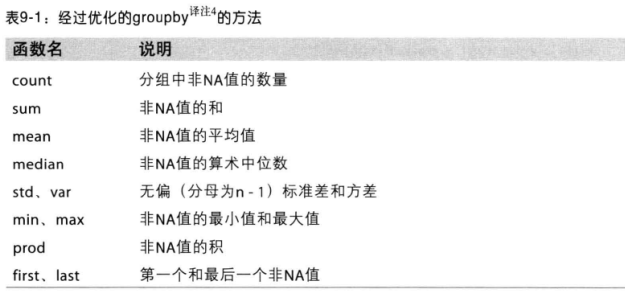

In [35]:
# agg方法支持传入自定义的聚合函数
def peak(arr):
    return arr.max() - arr.min()

df1

,data1,data2,key1,key2
0,1.096646,-1.436704,a,one
1,-0.201517,-0.752637,a,two
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two
4,-0.535238,-0.229636,a,one


In [36]:
grouped5 = df1.groupby('key1')
# 调用agg方法，传入自定义的聚合函数
grouped5.agg(peak)

,data1,data2
key1,,
a,1.631884,1.207069
b,0.134478,2.543454


### 面向列的多函数应用
可以一次应用多个聚合函数，或者对不同的列，应用不同的聚合函数。

In [38]:
# 给agg一次传入一组函数名，则可以一次应用多个聚合函数
# 注意，库中自带的mean、sum等函数，传入agg时是一个字符串表示其名字，而自定义函数则直接传入
grouped5.agg(['mean', peak])

data1               data2          
          mean      peak      mean      peak
key1                                        
a     0.119964  1.631884 -0.806326  1.207069
b     0.202429  0.134478 -0.810800  2.543454

In [39]:
# 如上，结果中自动根据函数名进行了索引命名
# 如果传入一个tuple的list，则可以实现自定义对各结果列的命名
grouped5.agg([('average','mean'),('range',peak)])

data1               data2          
       average     range   average     range
key1                                        
a     0.119964  1.631884 -0.806326  1.207069
b     0.202429  0.134478 -0.810800  2.543454

In [40]:
# 可以只对结果中的某些列应用聚合函数
grouped5['data1'].agg(['mean', peak])

,mean,peak
key1,,
a,0.119964,1.631884
b,0.202429,0.134478


In [42]:
# 给agg传入字典，可以指定对不同列应用不同的聚合函数
grouped5.agg({'data1':['mean',peak], 'data2':peak})

data2     data1          
          peak      mean      peak
key1                              
a     1.207069  0.119964  1.631884
b     2.543454  0.202429  0.134478

## 分组级运算和转换
数据聚合可以看做是分组级运算得到一个特殊例子。使用transform和apply方法，可实现更多其他的分组运算。

### transform

In [44]:
df1

,data1,data2,key1,key2
0,1.096646,-1.436704,a,one
1,-0.201517,-0.752637,a,two
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two
4,-0.535238,-0.229636,a,one


In [46]:
# 想要增加一列，存放根据key1分组后的各组平均值。
# 以前的方法：
k1_means = df1.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.119964,-0.806326
b,0.202429,-0.810800


In [47]:
pd.merge(df1, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,1.096646,-1.436704,a,one,0.119964,-0.806326
1,-0.201517,-0.752637,a,two,0.119964,-0.806326
4,-0.535238,-0.229636,a,one,0.119964,-0.806326
2,0.135190,0.460927,b,one,0.202429,-0.810800
3,0.269668,-2.082527,b,two,0.202429,-0.810800


In [49]:
# 可以使用transform函数一步完成
ts1 = df1.groupby('key1').transform(np.mean)
ts1

,data1,data2
0,0.119964,-0.806326
1,0.119964,-0.806326
2,0.202429,-0.810800
3,0.202429,-0.810800
4,0.119964,-0.806326


In [52]:
pd.concat([df1, ts1], axis=1)

,data1,data2,key1,key2,data1,data2
0,1.096646,-1.436704,a,one,0.119964,-0.806326
1,-0.201517,-0.752637,a,two,0.119964,-0.806326
2,0.135190,0.460927,b,one,0.202429,-0.810800
3,0.269668,-2.082527,b,two,0.202429,-0.810800
4,-0.535238,-0.229636,a,one,0.119964,-0.806326


### apply: 更一般性的 拆分-应用-合并 过程
transform也有一些特殊要求：传入的分组处理函数，必须返回标量值（将被广播）或者返回一个相同大小的结果数组。
而apply可以实现更一般化的对groupby分组对象的处理，将分组得到的各个小块逐一调用传入的函数处理，并将结果组合后返回。

In [61]:
# apply的处理结果可以是标量、与原来数组大小相同，也可以是任意大小的pandas对象。更加灵活。

# 自定义一个top2函数。为了练习，这里默认column是data2
def top2(arr, column='data2'):
    return arr.sort_values(by=column)[-2:]

# 但是在调用apply时，对于top2方法的参数，可以作为apply的参数传入，比如下面，指定column为data1
df1.groupby('key1').apply(top2, column='data1')
# 上面一句实现的功能就是，根据key1进行分组，对每一组，选出data1最大的前2个元素

data1     data2 key1 key2
key1                                
a    1 -0.201517 -0.752637    a  two
     0  1.096646 -1.436704    a  one
b    2  0.135190  0.460927    b  one
     3  0.269668 -2.082527    b  two

In [62]:
# groupby的参数group_keys=False可以禁止将分组的键作为层次化索引
df1.groupby('key1', group_keys=False).apply(top2, column='data1')

,data1,data2,key1,key2
1,-0.201517,-0.752637,a,two
0,1.096646,-1.436704,a,one
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two


### 分位数和桶分析
cut、qcut和groupby的结合

In [63]:
df2 = pd.DataFrame({'data1':np.random.randn(1000),
                    'data2':np.random.randn(1000)})
factor = pd.cut(df2.data1, 4) # 按max-min的范围，把df2的data1切成四份，每份数据不一样多
factor[:10]

0     (0.0549, 1.575]
1     (0.0549, 1.575]
2     (0.0549, 1.575]
3    (-2.992, -1.466]
4     (0.0549, 1.575]
5     (0.0549, 1.575]
6     (0.0549, 1.575]
7     (0.0549, 1.575]
8    (-1.466, 0.0549]
9    (-1.466, 0.0549]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.992, -1.466] < (-1.466, 0.0549] < (0.0549, 1.575] < (1.575, 3.096]]

In [65]:
# cut/qcut返回的对象，可直接用于groupby的分组依据
# 根据data1的切分结果，对data2进行分组，计算每组的sum
grouped10 = df2.data2.groupby(factor)
grouped10.apply(np.sum)
# 注意下面：左侧列为索引，名字data1说明是根据data1的cut结果作为分组依据
# name为data2，说明groupby和sum的计算对象是data2

data1
(-2.992, -1.466]    -7.745162
(-1.466, 0.0549]    15.745725
(0.0549, 1.575]      5.532957
(1.575, 3.096]      -2.258237
Name: data2, dtype: float64

## 透视表和交叉表
### pivot

In [66]:
df1

,data1,data2,key1,key2
0,1.096646,-1.436704,a,one
1,-0.201517,-0.752637,a,two
2,0.135190,0.460927,b,one
3,0.269668,-2.082527,b,two
4,-0.535238,-0.229636,a,one


In [74]:
# 想根据key1和key2分组，计算各组data1的平均值（pivot_table的默认聚合函数）
# 注意：此处参数与书第一版不同，参见 http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
df1.pivot_table(['data1'], index=['key1'], columns=['key2'])

data1          
key2       one       two
key1                    
a     0.280704 -0.201517
b     0.135190  0.269668

In [78]:
df1.pivot_table(index=['key1','key2'])

data1     data2
key1 key2                    
a    one   0.280704 -0.833170
     two  -0.201517 -0.752637
b    one   0.135190  0.460927
     two   0.269668 -2.082527

In [80]:
# aggfunc指定聚合函数
df1.pivot_table(['data1'], index=['key1'], columns=['key2'], aggfunc=len)

data1     
key2   one  two
key1           
a      2.0  1.0
b      1.0  1.0

In [83]:
# margins指定添加小计All
df1.pivot_table(['data1'], index=['key1'], columns=['key2'],aggfunc=len, margins=True)

data1          
key2   one  two  All
key1                
a      2.0  1.0  3.0
b      1.0  1.0  2.0
All    3.0  2.0  5.0

### crosstab

In [82]:
# pivot_table可以实现交叉表
# crosstab也可以更方便
pd.crosstab(df1.key1, df1.key2, margins=True)

key2,one,two,All
key1,,,
a,2,1,3
b,1,1,2
All,3,2,5
